In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [3]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [5]:
# Loading the Advertising dataset
ad_data = pd.read_csv("Advertising.csv")

In [7]:
# Display first few rows and check the structure
ad_data.head(), ad_data.sample(5), ad_data.info(), ad_data.columns, ad_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


(   Unnamed: 0     TV  Radio  Newspaper  Sales
 0           1  230.1   37.8       69.2   22.1
 1           2   44.5   39.3       45.1   10.4
 2           3   17.2   45.9       69.3    9.3
 3           4  151.5   41.3       58.5   18.5
 4           5  180.8   10.8       58.4   12.9,
      Unnamed: 0     TV  Radio  Newspaper  Sales
 190         191   39.5   41.1        5.8   10.8
 117         118   76.4    0.8       14.8    9.4
 144         145   96.2   14.8       38.9   11.4
 73           74  129.4    5.7       31.3   11.0
 85           86  193.2   18.4       65.7   15.2,
 None,
 Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object'),
        Unnamed: 0          TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000  200.000000
 mean   100.500000  147.042500   23.264000   30.554000   14.022500
 std     57.879185   85.854236   14.846809   21.778621    5.217457
 min      1.000000    0.700000    0.000000    0.300000    1.600000
 25

In [9]:
# Check for missing values and duplicates in the dataset
ad_data.isnull().sum(), ad_data[ad_data.duplicated()]

(Unnamed: 0    0
 TV            0
 Radio         0
 Newspaper     0
 Sales         0
 dtype: int64,
 Empty DataFrame
 Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
 Index: [])

<Axes: xlabel='TV', ylabel='Sales'>

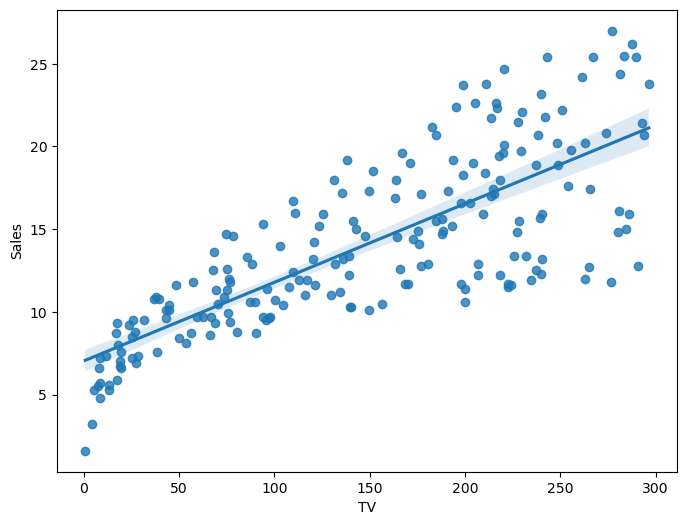

In [11]:
# Visualize relationship between TV and Sales
plt.figure(figsize=(8,6))
sns.regplot(x='TV', y='Sales', data=ad_data)

<Axes: xlabel='Newspaper', ylabel='Sales'>

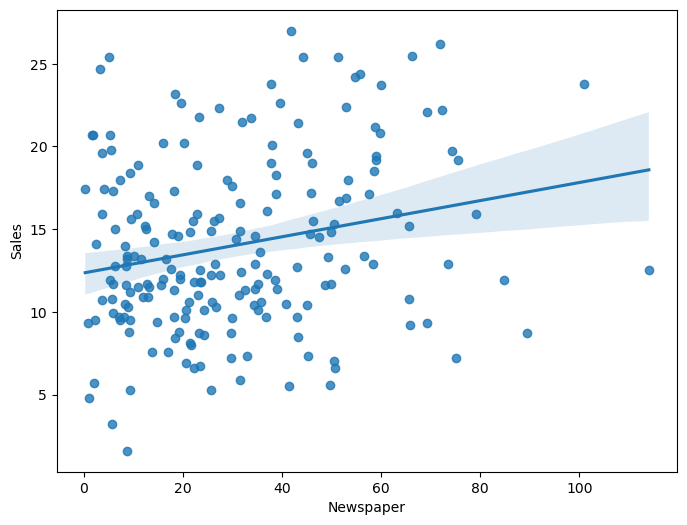

In [13]:
# Visualize relationship between Newspaper and Sales
plt.figure(figsize=(8,6))
sns.regplot(x='Newspaper', y='Sales', data=ad_data)

<Axes: xlabel='Radio', ylabel='Sales'>

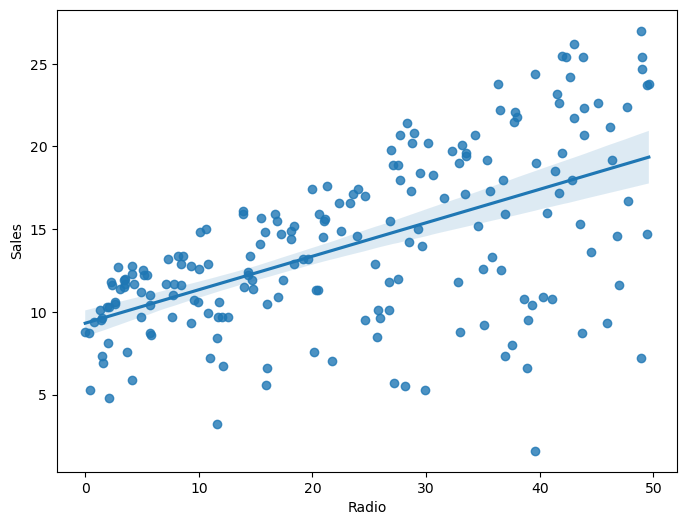

In [15]:
# Visualize relationship between Radio and Sales
plt.figure(figsize=(8,6))
sns.regplot(x='Radio', y='Sales', data=ad_data)

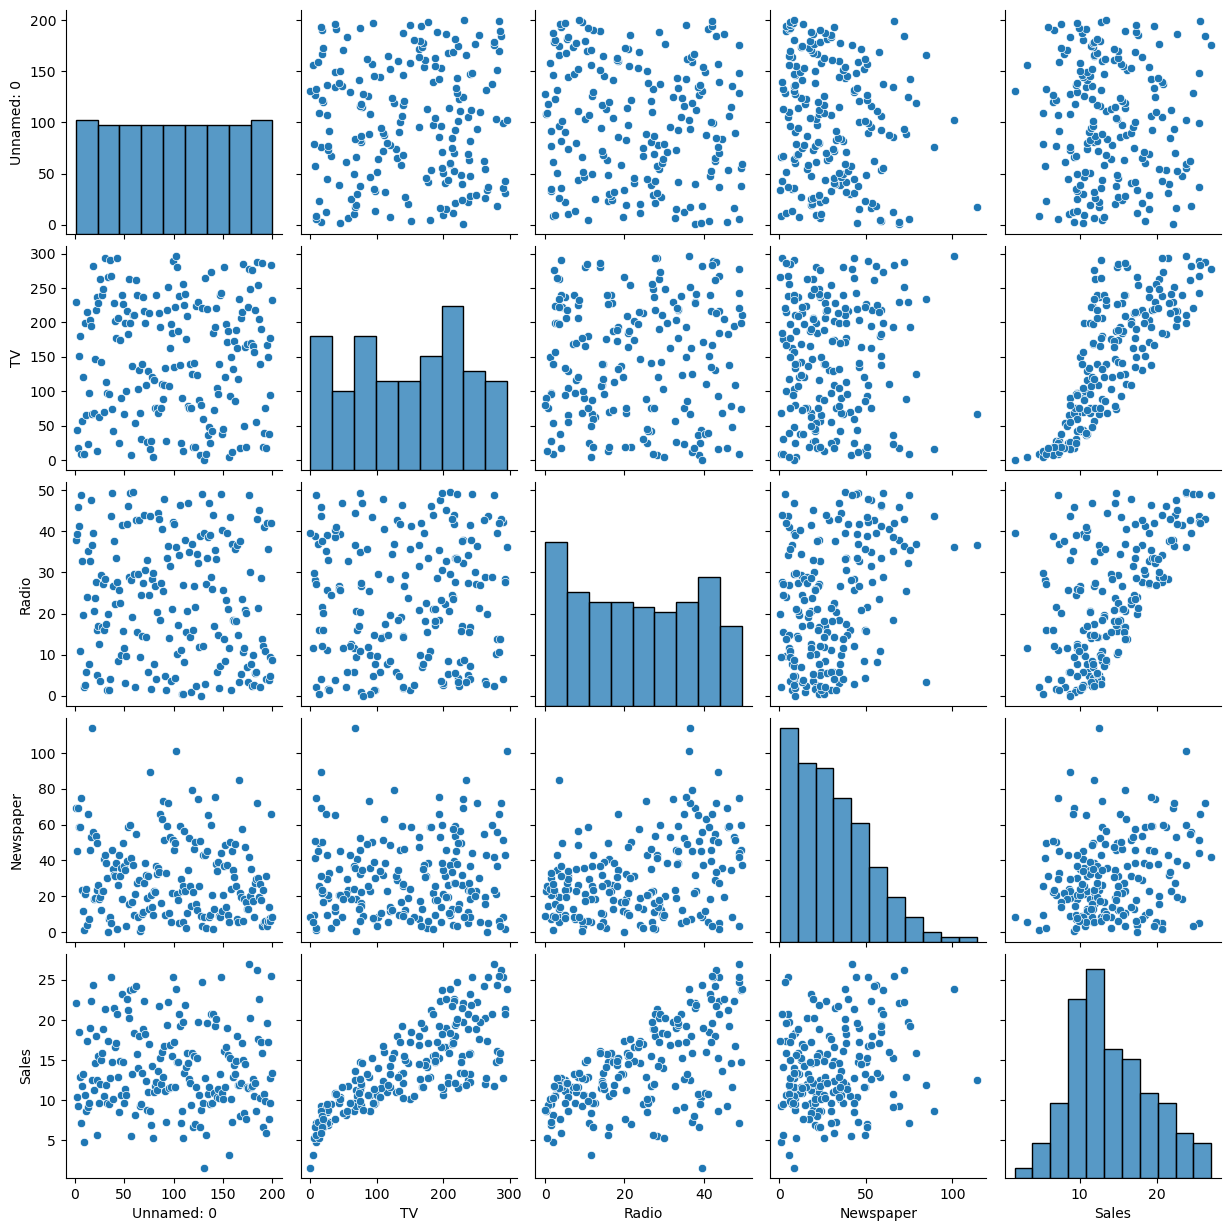

In [17]:
# Pairplot to visualize relationships between all features
sns.pairplot(ad_data)

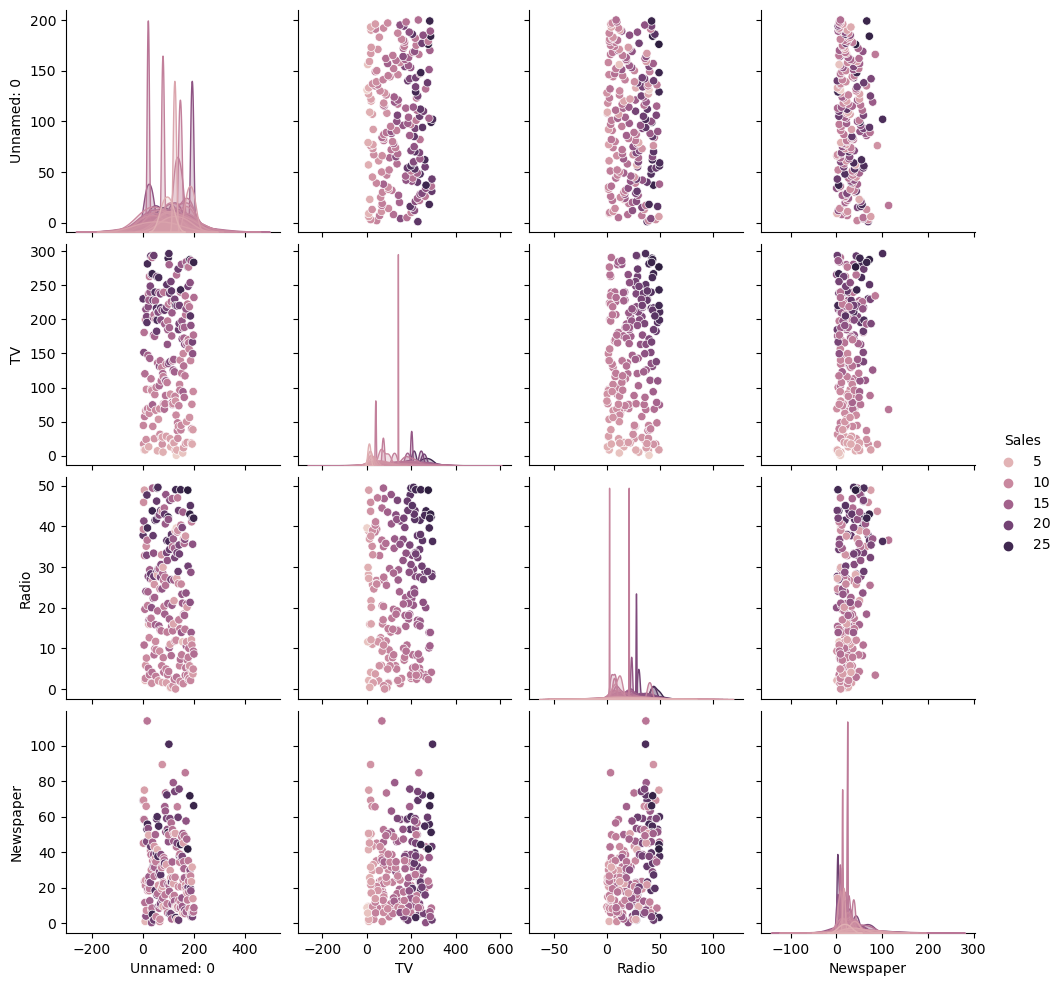

In [18]:
# Pairplot with a hue based on Sales to see distributions more clearly
sns.pairplot(data=ad_data, hue='Sales')

In [20]:
# Feature and target separation
X_features = ad_data[['Unnamed: 0', 'TV', 'Radio', 'Newspaper']]
y_target = ad_data[['Sales']]

In [23]:
# Scaling the features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [25]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, shuffle=True)

In [27]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [29]:
# Training the Linear Regression model
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predicting the sales on test data
y_lr_pred = lr_model.predict(X_test)

In [33]:
# Evaluating Linear Regression model performance
from sklearn.metrics import r2_score
print(f"Linear Regression - Training accuracy: {r2_score(y_train, lr_model.predict(X_train))}")
print(f"Linear Regression - Test accuracy: {r2_score(y_test, y_lr_pred)}")

Linear Regression - Training accuracy: 0.9090855749917418
Linear Regression - Test accuracy: 0.8503820702479892


In [35]:
# Random Forest model for comparison
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)

In [37]:
# Training the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# Predicting sales with the Random Forest model
y_rf_pred = rf_model.predict(X_test)

In [41]:
# Evaluating Random Forest model performance
rf_r2 = r2_score(y_test, y_rf_pred)
print(f"Random Forest - Test accuracy: {rf_r2}")

Random Forest - Test accuracy: 0.9734126017077


In [45]:
# Make predictions on the test data
y_lr_pred = lr_model.predict(X_test)

# View the predictions
print("Linear Regression Predictions:")
print(y_lr_pred)

Linear Regression Predictions:
[[11.72598753]
 [ 4.61402627]
 [16.30984367]
 [13.78562041]
 [ 4.04124575]
 [19.95924881]
 [ 9.46675377]
 [17.94294831]
 [23.26935859]
 [15.19345628]
 [ 4.63370892]
 [19.31901895]
 [19.2143888 ]
 [12.52603814]
 [ 8.97046011]
 [ 8.63840506]
 [16.59217031]
 [21.79382094]
 [14.44071948]
 [12.13042224]
 [10.98186938]
 [18.33784391]
 [12.36273571]
 [22.50004302]
 [14.57789043]
 [10.17351593]
 [ 9.26269981]
 [12.67245874]
 [11.32546217]
 [ 9.17715515]
 [11.04294028]
 [15.56871498]
 [11.92169182]
 [14.89159875]
 [17.6801449 ]
 [20.357255  ]
 [20.37139844]
 [13.40520722]
 [ 9.7019291 ]
 [15.73429893]]


In [47]:
# Make predictions with the Random Forest model
y_rf_pred = rf_model.predict(X_test)

# View the predictions
print("Random Forest Predictions:")
print(y_rf_pred)


Random Forest Predictions:
[12.112  7.314 17.396 12.804  5.335 21.206  8.566 19.481 24.037 15.792
  6.753 20.018 19.86  12.093  5.402 10.214 15.359 22.176 15.411 12.433
  6.536 18.887 11.645 23.182 11.305  9.773 11.144  8.172  7.917  8.034
  5.699 15.813 12.157 15.127 18.291 21.863 19.918 11.75  11.045 15.577]
